In [5]:
import pandas as pd
from konlpy.tag import Mecab
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [23]:
tmp = pd.read_csv("wordcloud/rr_12star.csv")
tmp.head()


,review
0,"2,000원에 무소음이라 샀는데, 초침돌아가는 소리에 잠을 잘수가 없어요.\r\n장..."
1,팔걸이부분에 오백원 동전크기의 갈색 오염이 묻어 왔어요ㅜㅜ\r\n처음 개봉하자마자 ...
2,배송 받자마자 포장풀어놨더니 방안 가득 곰팡이냄새같은 쿰쿰하고 찜찜한 냄새가 가득 ...
3,세트를 샀다고 생각했는데 판자. 다리.다리 이렇게 세조각이 따로 옴\r\n나사 하나...
4,세일이라 사고싶은데 온라인은 세일 기간 내내 품절이네요.. 물건도 없으면서 뭘 세일...


In [24]:
text = []
for i in range(len(tmp)):
    if re.match(pattern='[A-z]+', string = tmp.review[i]):
        pass
    else:
        text.append(tmp.review[i])
print(len(text))
print(text[:5])

669
['2,000원에 무소음이라 샀는데, 초침돌아가는 소리에 잠을 잘수가 없어요.\r\n장속에 넣었다가 결국 배터리 뺐습니다.\r\n반품 귀찮아 그냥 버리지못하고 구석에 있네요.', '팔걸이부분에 오백원 동전크기의 갈색 오염이 묻어 왔어요ㅜㅜ\r\n처음 개봉하자마자 발견해서 너무 우울합니다', '배송 받자마자 포장풀어놨더니 방안 가득 곰팡이냄새같은 쿰쿰하고 찜찜한 냄새가 가득 합니다. 향초 도 피우고 편백수도 뿌려줘도 냄새가 안없어져요. 시트 열어서 세탁이라도 해보고싶은데 도데체 열리지가 않아서 결국 섬유탈취제 뿌려놨어요. 제발 냄새 좀 빠졌으면 좋겠어요. 다른분들 댓글보고 산거라 어느정도 냄새가 날것이라 예상했지만 직접 맡아보니 냄새가 너무 역하고 머리가 아픕니다.', '세트를 샀다고 생각했는데 판자. 다리.다리 이렇게 세조각이 따로 옴\r\n나사 하나도 없고 판자는 구멍도 없고(이케아는 이런게 많긴 하지만)  \r\n판자는 시트지 붙인 느낌남', '세일이라 사고싶은데 온라인은 세일 기간 내내 품절이네요.. 물건도 없으면서 뭘 세일하는지??']


In [25]:
stopwords = ['사용', '구매', '제품', '추천', '구입', '만족', '대비', '생각', '부분', '정도', '물건', '처음', '하나', '때문', '이거', '이것']

In [26]:
from konlpy.tag import Kkma
tagger = Kkma()
tokens = []
for text in text:
    tmp = tagger.nouns(text)
    for i in tmp:
        if i not in stopwords:
            if len(i) > 1:
                try:
                    int(i)
                except:
                    tokens.append(i)

print(tokens)

['2,000', '2,000원', '무소', '초침', '소리', '장속', '결국', '배터리', '반품', '구석', '팔걸이', '팔걸이부분', '오백원', '동전', '동전크기', '크기', '갈색', '오염', '개봉', '발견', '우울', '배송', '포장', '방안', '곰팡이', '곰팡이냄새', '냄새', '향초', '백수', '시트', '세탁', '도데체', '열리', '열리지가', '지가', '결국', '섬유', '섬유탈취제', '탈취제', '댓글보고', '보고', '산거', '예상', '머리', '세트', '판자', '다리', '세조각', '조각', '구멍', '시트지', '트지', '느낌', '세일', '온라인', '기간', '품절', '무엇', '사고', '한번', '기계손', '기계손잡이', '잡이', '거품', '분리', '절대', '중식', '보관', '상품', '상품설명', '설명', '아래', '고객', '고객센터', '센터', '답변', '앵무새', '가능', '리뷰', '낭패', '환불', '가야', '사이트', '사진', '사진상', '파우더', '핑크', '실물', '연보라', '흰색', '구분', '하단', '크기', '안정적', '오일', '번째', '내고', '식초', '베이', '베이킹소다', '소다', '연마제', '안쪽', '상단', '계속', '키친', '키친타올', '타올', '연마제이지만', '이지만', '불편', '구체적', '스테인레스', '재질', '확인', '저급', '지금', '식기', '식기건조대', '건조대', '종류', '녹이', '가격', '무인', '무인양품', '양품', '자주', '스테인레스304', '표시', '고양', '이름', '사이즈', '이즈', '판매', '상품', '3900원', '상품택', '세탁', '먼지', '장난', '찍찍이', '하면', '끈끈이', '20장', '듯이', '구김', '문제', '세탁', '세탁후', '건조', '스펀지', '이틀', '말랐어도

In [27]:
from PIL import Image
import numpy as np

In [31]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

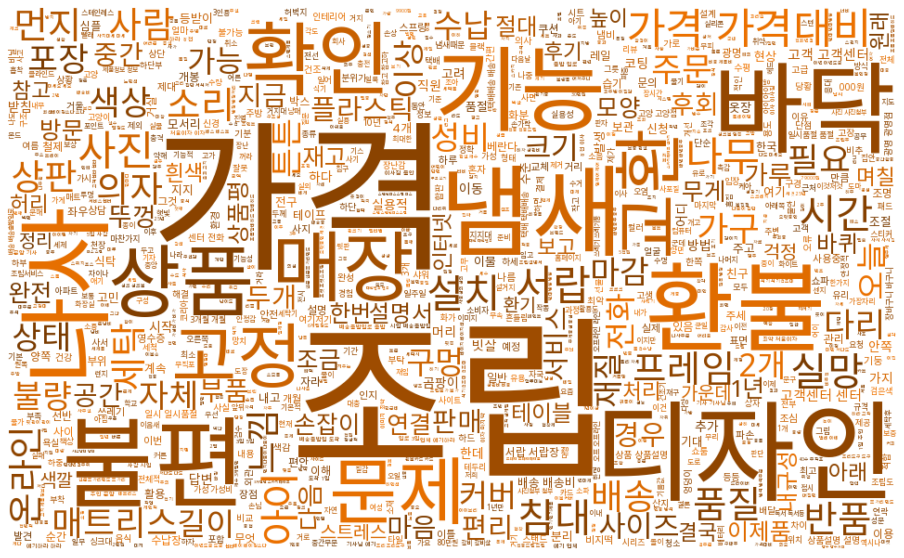

In [32]:
mask = np.array(Image.open('wordcloud/cloud.png'))

wordcloud = WordCloud(
    font_path=r'C:/Windows/Fonts/NotoIKEAKorean-Regular.ttf',
    background_color='white',
    max_words=2000,
    mask=mask,
    color_func = random_color_func
).generate(' '.join(tokens))
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
import matplotlib

import matplotlib.font_manager as fm

font_location = 'c:/windows/fonts/NotoIKEAKorean-Regular.ttf'
                    # ex - 'C:/asiahead4.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)
matplotlib.rcParams.update({'font.size': 22})

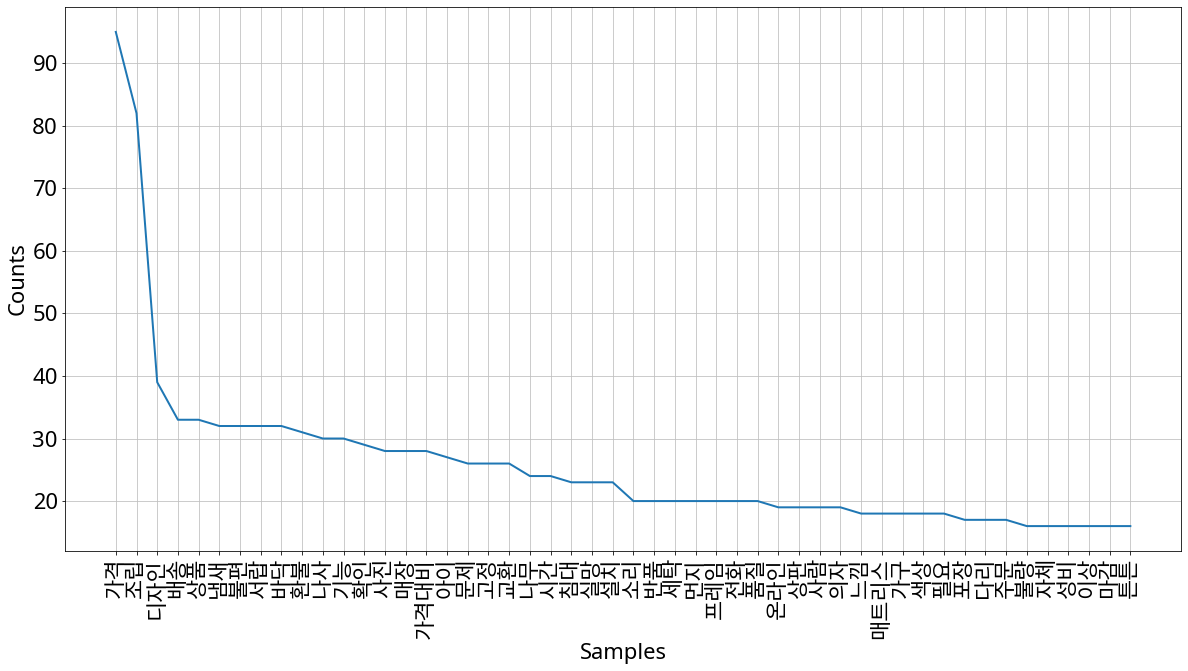

In [30]:
import nltk

plt.figure(figsize=(20,10))
words = nltk.Text(tokens, name='단어 빈도수')
words.plot(50) # 50개만
plt.show()